In [1]:
import numpy as np
import pandas as pd
import cv2
import xml.etree.ElementTree as ET

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dict_characters = {1:'NEUTROPHIL',2:'EOSINOPHIL',3:'MONOCYTE',4:'LYMPHOCYTE'}
dict_characters2 = {0:'Mononuclear',1:'Polynuclear'}

In [3]:
import os
image_name = 'C:\\Users\\jodv\\YPcase\\kickstart2020\\Data\\Original_Images\\BloodImage_00022.jpg'

# Plot one of the images

[[[154 160 171]
  [154 160 171]
  [154 160 171]
  ...
  [161 145 179]
  [161 144 178]
  [159 142 176]]

 [[156 162 173]
  [155 161 172]
  [156 162 173]
  ...
  [159 145 179]
  [159 143 177]
  [157 141 175]]

 [[156 165 175]
  [156 165 175]
  [156 165 175]
  ...
  [158 147 180]
  [156 142 176]
  [153 139 173]]

 ...

 [[174 176 186]
  [168 170 180]
  [163 161 173]
  ...
  [189 211 206]
  [187 209 204]
  [183 206 201]]

 [[179 182 190]
  [173 175 185]
  [167 165 177]
  ...
  [192 213 205]
  [190 211 203]
  [186 209 201]]

 [[182 185 193]
  [176 179 187]
  [171 169 181]
  ...
  [195 213 206]
  [190 211 203]
  [188 209 201]]]


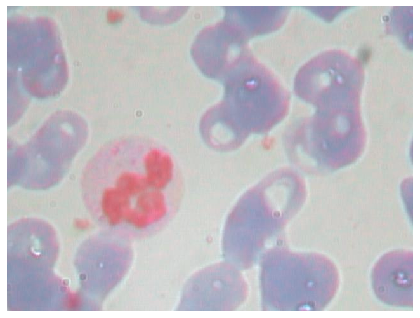

In [4]:
def plotImage(image_location):
    image = cv2.imread(image_location)
    cv2.imwrite("../Data/Original_Images/BloodImage2_00000.jpg", image)
    print(image)
    plt.imshow(image)
    return
image_name = '../Data/Original_Images/BloodImage_00000.jpg'
image_name = 'C:\\Users\\jodv\\YPcase\\kickstart2020\\Data\\Original_Images\\BloodImage_00022.jpg'
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.axis('off') 
plotImage(image_name)

# Read in the metaData from an xml file

### Manually explore the xml file and library

In [68]:
import xml.etree.cElementTree as ET

root = ET.Element("wbcs")
doc = ET.SubElement(root, "wbc")



#3ET.SubElement(doc, "field1", name="blah").text = "some value1"
#ET.SubElement(doc, "field2", name="asdfasd").text = "some vlaue2"

tree = ET.ElementTree(root)
tree.write("filename.xml")

In [69]:
tree = ET.parse('../notebooks/filename.xml')
a = tree.find('wbc') 
b = ET.SubElement(a,"BloodImage_00000.xml") # get xml file name to easily link

ET.SubElement(b, "location").text = "(1,3)"
ET.SubElement(b, "radius").text = "12"

tree.write("filename.xml")

In [10]:
tree = ET.parse('../Data/Annotations_Original_Images/BloodImage_00000.xml')
root = tree.getroot()

obj_nr = 0
for obj in root.iter('object'):
    obj_nr+=1
    print(f"Object number {obj_nr}: ")
    for name in obj.iter('name'):
        print(f"\tObject name: {name.text} ")

Object number 1: 
	Object name: WBC 
Object number 2: 
	Object name: RBC 
Object number 3: 
	Object name: RBC 
Object number 4: 
	Object name: RBC 
Object number 5: 
	Object name: RBC 
Object number 6: 
	Object name: RBC 
Object number 7: 
	Object name: RBC 
Object number 8: 
	Object name: RBC 
Object number 9: 
	Object name: RBC 
Object number 10: 
	Object name: RBC 
Object number 11: 
	Object name: RBC 
Object number 12: 
	Object name: RBC 
Object number 13: 
	Object name: RBC 
Object number 14: 
	Object name: RBC 
Object number 15: 
	Object name: RBC 
Object number 16: 
	Object name: RBC 
Object number 17: 
	Object name: RBC 
Object number 18: 
	Object name: RBC 
Object number 19: 
	Object name: RBC 
Object number 20: 
	Object name: RBC 


### automatically parse the image annotations

In [11]:
tree = ET.parse('../Data/Annotations_Original_Images/BloodImage_00000.xml')
for elem in tree.iter():
    if 'width' in elem.tag:
            print(int(elem.text))

640


In [12]:
def parse_annotation(ann_dir, labels=[]):
    all_imgs = []
    seen_labels = {}
    img = {'object': []} #dictionary
    tree = ET.parse(ann_dir)
    cellnbr=0
    for elem in tree.iter():
        
        if 'width' in elem.tag:
            img['width'] = int(elem.text)
        if 'height' in elem.tag:
            img['height'] = int(elem.text)
        if 'filename' in elem.tag:
            img['filename'] = elem.text
        if 'object' in elem.tag or 'part' in elem.tag:
            obj = {}

            for attr in list(elem):
                
                if 'name' in attr.tag:
                    cellnbr+=1
                    obj['name'] = attr.text

                    if obj['name'] in seen_labels:
                        seen_labels[obj['name']] += 1
                    else:
                        seen_labels[obj['name']] = 1

                    if len(labels) > 0 and obj['name'] not in labels:
                        break
                    else:
                        obj['name'] = attr.text+str (cellnbr)
                        img['object'] += [obj]

                if 'bndbox' in attr.tag:
                    for dim in list(attr):
                        if 'xmin' in dim.tag:
                            obj['xmin'] = int(round(float(dim.text)))
                        if 'ymin' in dim.tag:
                            obj['ymin'] = int(round(float(dim.text)))
                        if 'xmax' in dim.tag:
                            obj['xmax'] = int(round(float(dim.text)))
                        if 'ymax' in dim.tag:
                            obj['ymax'] = int(round(float(dim.text)))

    if len(img['object']) > 0:
        all_imgs += [img]

    return all_imgs, seen_labels

In [13]:
test = ["a","b","d","e"]
print(sorted(list(set(test))))

['a', 'b', 'd', 'e']


In [14]:
import kivy
kivy.version

[INFO   ] [Logger      ] Record log in C:\Users\jodv\.kivy\logs\kivy_20-09-13_1.txt
[INFO   ] [deps        ] Successfully imported "kivy_deps.glew" 0.2.0
[INFO   ] [deps        ] Successfully imported "kivy_deps.sdl2" 0.2.0
[INFO   ] [Kivy        ] v1.11.1
[INFO   ] [Kivy        ] Installed at "c:\users\jodv\anaconda3\envs\kickstart1020\lib\site-packages\kivy\__init__.py"
[INFO   ] [Python      ] v3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
[INFO   ] [Python      ] Interpreter at "c:\users\jodv\anaconda3\envs\kickstart1020\python.exe"


' 0.2.0'

In [15]:
annotation = parse_annotation(ann_dir="../Data/Annotations_Original_Images/BloodImage_00034.xml")
annotation

([{'object': [{'name': 'WBC1',
     'xmin': 350,
     'ymin': 181,
     'xmax': 543,
     'ymax': 359},
    {'name': 'WBC2', 'xmin': 310, 'ymin': 351, 'xmax': 458, 'ymax': 480},
    {'name': 'Platelets3', 'xmin': 524, 'ymin': 334, 'xmax': 562, 'ymax': 377},
    {'name': 'Platelets4', 'xmin': 52, 'ymin': 85, 'xmax': 90, 'ymax': 128},
    {'name': 'RBC5', 'xmin': 127, 'ymin': 130, 'xmax': 259, 'ymax': 270},
    {'name': 'RBC6', 'xmin': 97, 'ymin': 298, 'xmax': 205, 'ymax': 415},
    {'name': 'RBC7', 'xmin': 1, 'ymin': 336, 'xmax': 107, 'ymax': 453},
    {'name': 'RBC8', 'xmin': 62, 'ymin': 407, 'xmax': 174, 'ymax': 480},
    {'name': 'RBC9', 'xmin': 518, 'ymin': 1, 'xmax': 602, 'ymax': 98},
    {'name': 'RBC10', 'xmin': 484, 'ymin': 17, 'xmax': 568, 'ymax': 128},
    {'name': 'RBC11', 'xmin': 452, 'ymin': 34, 'xmax': 537, 'ymax': 145},
    {'name': 'RBC12', 'xmin': 409, 'ymin': 54, 'xmax': 494, 'ymax': 165},
    {'name': 'RBC13', 'xmin': 358, 'ymin': 84, 'xmax': 443, 'ymax': 195},
    {'

# Print image allongise it's annotations

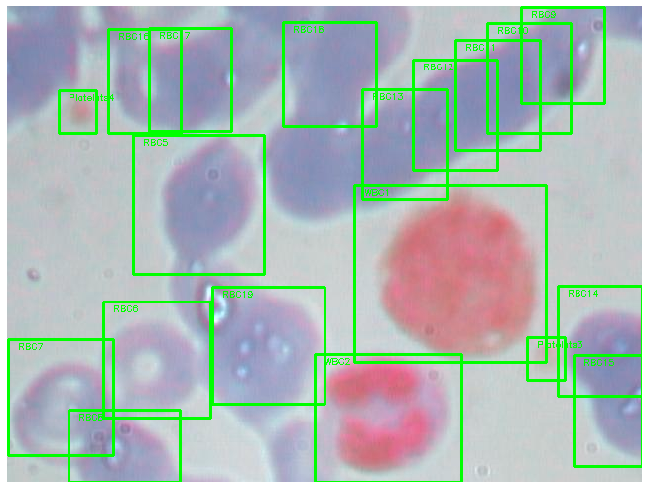

In [16]:
def AddAnnotationToImage(image,image_annotation):
    annotation_data = image_annotation[0][0]
    
    for cell in annotation_data["object"]:
        cv2.rectangle(image,(cell['xmin'],cell['ymin']),(cell['xmax'],cell['ymax']),(0,255,0),2)
        cv2.putText(image,cell['name'],(cell['xmin']+10,cell['ymin']+10),0,0.3,(0,255,0))
    return image

image_name = '../Data/Original_Images/BloodImage_00034.jpg'
image = cv2.imread(image_name)

plt.figure(figsize=(25,25))
plt.subplot(221)
plt.axis('off') 


im2=AddAnnotationToImage(image,annotation)
plt.imshow(im2)

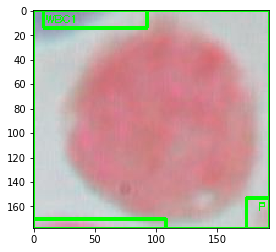

In [33]:
#make sure that image is the image without the rectangles
#if multiple WBC's -> return multiple pictures.

def findwbc(image,image_annotation):
    
    annotation_data = image_annotation[0][0]
    images=[]
    for cell in annotation_data["object"]:
        if(cell['name'][0:3] == "WBC"):
            images.append(image[cell['ymin']:cell['ymax'],cell['xmin']:cell['xmax']])
    return images

images=findwbc(im2,annotation)                 